In [ ]:
!mkdir known

In [ ]:
!mkdir unknown

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 31kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=741144154f099716aae518302f072699a9cb52644efa0a34bf91db29c6cf14a5
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

In [ ]:
def read_img(path):
   img = cv2.imread(path) ## reading image
   (h,w) = img.shape[:2]  ## fetching height and width
   width = 500            ## hard coding width
   ratio = width / float(w) ## preparing a ration for height
   height = int(h * ratio)  ## generating new height
   return cv2.resize(img,(width,height)) ##return the reshaped image

In [ ]:
known_encodings = [] 
known_names = []
known_dir = 'known' ##Known directory path
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file) ##Reading all the images
  img_enc = face_recognition.face_encodings(img)[0] ##face encodings
  known_encodings.append(img_enc) 
  known_names.append(file.split('.')[0])
print(known_names) ## Printing all the known labels

['steve', 'elon', 'bill']


Processing 2.jpg
[0.37270716 0.77683722 0.74778098]


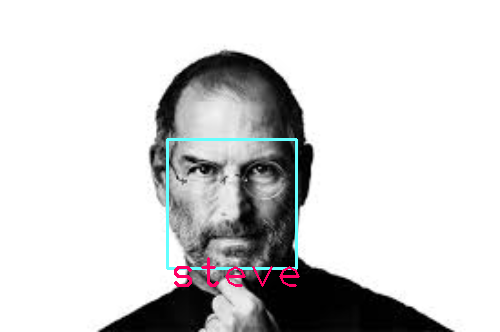

Processing 3.jpg
[0.81399637 0.30758034 0.75923   ]


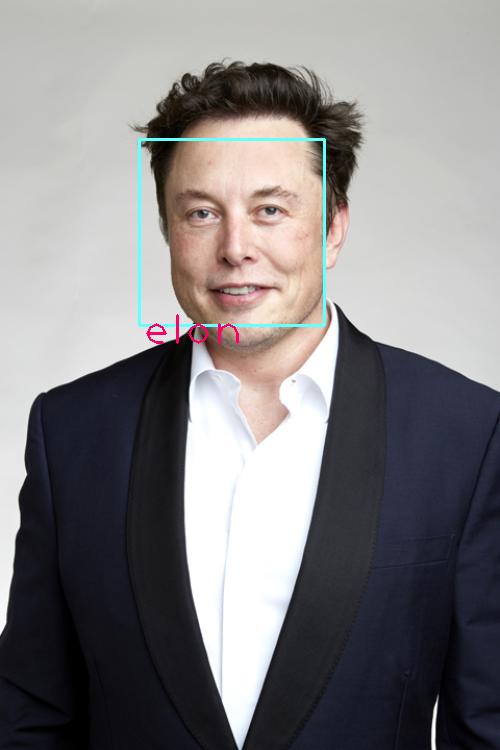

Processing 6.jpg
[0.74106836 0.42020634 0.72988833]


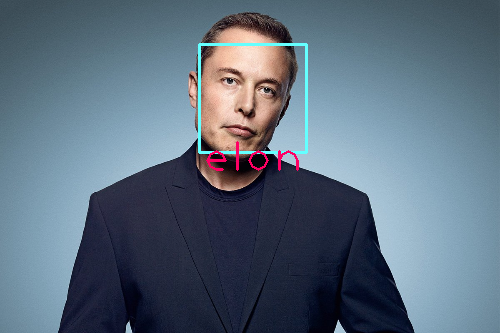

Processing .ipynb_checkpoints


AttributeError: ignored

In [ ]:
unknown_dir = 'unknown' ##UNknown Images Directory
for file in os.listdir(unknown_dir):
 print("Processing",file)
 img = read_img(unknown_dir + '/' + file)##reading images
 img_enc = face_recognition.face_encodings(img)[0]##Encodings
 results = face_recognition.compare_faces(known_encodings,img_enc)
 ##Comparing Known Encodings with Unknown encoding
 print(face_recognition.face_distance(known_encodings,img_enc))
 ## Printing Face Distances
 res = [i for i, val in enumerate(results) if val]
 name = known_names[res[0]]
 
 '''
Drawing a rectangle box around the faces of unknown images using  face_locations function in library
'''
 (top,right,bottom,left) = face_recognition.face_locations(img)[0]
 cv2.rectangle(img,(left,top),(right,bottom),(255,255,100),2)
 ##Drawing Rectangle
 cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,3, (100,0,255),2) ##Putting labels(names) on the rectangle
 cv2_imshow(img) ##showing images

In [ ]:
img_enc

array([-0.04487049,  0.1494949 ,  0.10818757, -0.00116382, -0.15792415,
        0.02352742, -0.02162735, -0.10987096,  0.19488548, -0.10035618,
        0.28090724, -0.028636  , -0.24944296, -0.01756732,  0.00619251,
        0.09686477, -0.10726324, -0.15856393, -0.03718537, -0.10753175,
        0.12583131,  0.05637524, -0.017545  , -0.07544328, -0.152649  ,
       -0.29761156, -0.09279814, -0.07648839,  0.15977354, -0.11265375,
       -0.00927545,  0.04735298, -0.1377103 , -0.07146608,  0.03465829,
        0.02324668, -0.05745199, -0.03838044,  0.20873962, -0.03893361,
       -0.18380822,  0.00687462,  0.02135359,  0.21399535,  0.133848  ,
        0.05395894,  0.06693393, -0.12859295,  0.04615046, -0.21981321,
        0.11731938,  0.18011445,  0.10186753,  0.05089016,  0.17215788,
       -0.22821254, -0.06029655,  0.17514989, -0.1404935 ,  0.15816821,
        0.09915147, -0.06494088, -0.02546284, -0.06138781,  0.15945163,
        0.02642776, -0.05485051, -0.1503218 ,  0.22064444, -0.08